Importing libraries

In [17]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 4)

Dropping "unnamed" column

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Running descriptive statistics 

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Pulling correlation b/t variables

<AxesSubplot:>

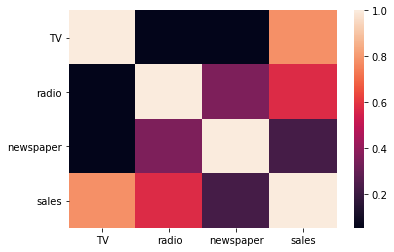

In [10]:
corr = df.corr()
sns.heatmap(corr)

In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [12]:
## we can see from the above two outputs that TV is highest correlated with sales and then is radio and then is newspaper.

Splitting attributes

In [13]:
labels = df['sales']
features = df.drop(['sales'], axis=1)

Plotting between features and label

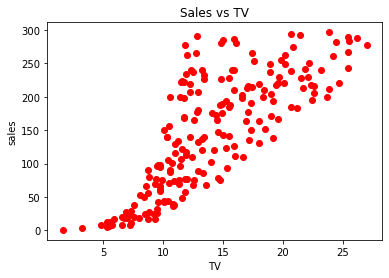

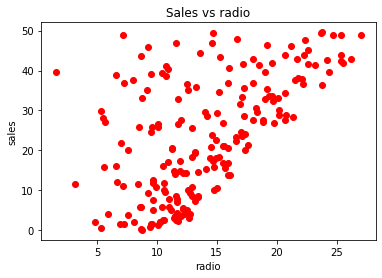

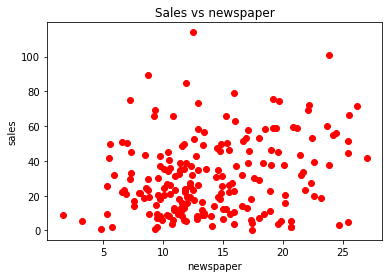

In [18]:
for x in features:
    plt.plot(labels, features[x], 'ro')  # arguments are passed to np.histogram
    plt.title("Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("sales")
    plt.show()

In [19]:
## The inference drawn from the correlation matrix is quiet evident from the above scatter plot as well.

Plotting distribution of each predictor features

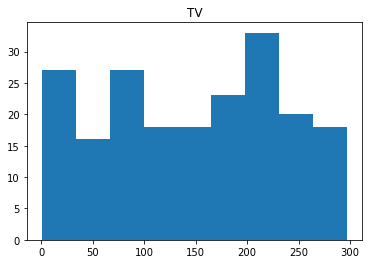

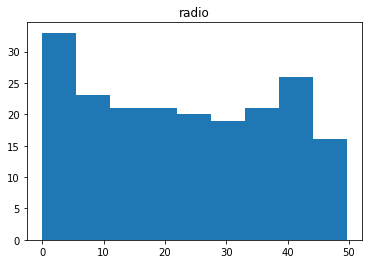

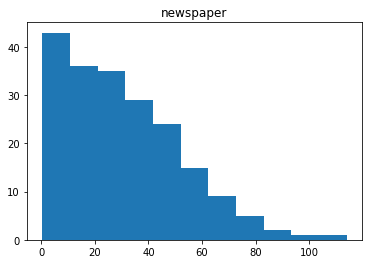

In [20]:
for x in features:
    plt.hist(features[x], bins='auto')  # arguments are passed to np.histogram
    plt.title(x)
    plt.show()

In [21]:
## we can see from the above plot that attribute newspaper is skewed towards left.
## The next process would be to apply transformation over the newspaper variable to make it fit for the model.

Box - Cox transformation over - newspaper - attribute

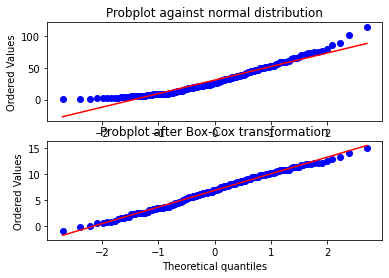

In [23]:
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)
df['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df['newspaper'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

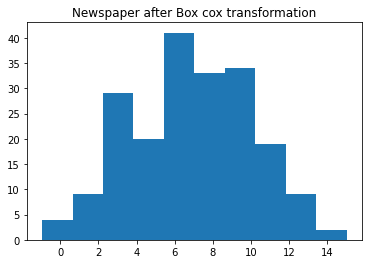

In [24]:
plt.hist(df['newspaper'], bins='auto')  
plt.title("Newspaper after Box cox transformation")
plt.show()

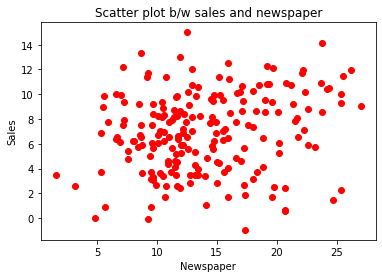

In [25]:
plt.plot(df['sales'], df['newspaper'], 'ro')  
plt.title("Scatter plot b/w sales and newspaper")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [26]:
## The above scatter plot depicts that there is no relationship between sales and newspaper.
## The contribution in sales from spend in newspaper is quiet questionable.
## Thus,we'll be building 3 models - one with all the contributing channels - second with only TV and raio - thrid only with TV

Model Building

In [27]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
model2 = sm.ols(formula="sales~TV+radio", data=df).fit()
model3 = sm.ols(formula="sales~TV", data=df).fit()
#sales~TV+radio+newspaper
print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        23:31:32   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8894      0.361      7.995      0.0

In [36]:
#model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()

#R-squared:                       0.897
#Adj. R-squared:                  0.896
#F-statistic:                     570.3
#Prob (F-statistic):           1.58e-96
#Log-Likelihood:                -386.18
#AIC:                             780.4
#BIC:                             793.6

#Model2
#model2 = sm.ols(formula="sales~TV+radio", data=df).fit()
#R-squared:                       0.897
#Adj. R-squared:                  0.896
#F-statistic:                     859.6
#Prob (F-statistic):           4.83e-98
#Log-Likelihood:                -386.20
#AIC:                             778.4
#BIC:                             788.3
    
#Model3
#model3 = sm.ols(formula="sales~TV", data=df).fit()
#R-squared:                       0.612
#Adj. R-squared:                  0.610
#F-statistic:                     312.1
#Prob (F-statistic):           1.47e-42
#Log-Likelihood:                -519.05
#AIC:                             1042.
#BIC:                             1049.

#From the above results it is clear that the 'model 2' with feature 'radio' and 'TV' is having the lowestAIC & BIC values.

In [29]:
print('Parameters: ', model2.params)
print('R2: ', model2.rsquared)
print('Standard errors: ', model2.bse)

Parameters:  Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64
R2:  0.8971942610828957
Standard errors:  Intercept    0.29449
TV           0.00139
radio        0.00804
dtype: float64


In [30]:
## Regression equation 

## Sales = 2.921100 + 0.045755 * TV + 0.187994 * Radio

## We can also infer from the above equation that radio is more significant than TV when considered together.

In [31]:
#Actual and predicted values
y_pred = model2.predict()
df1 = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})  
df1.head(10)

,Actual,Predicted
0,22.1,20.555465
1,10.4,12.345362
2,9.3,12.337018
3,18.5,17.617116
4,12.9,13.223908
5,7.2,12.512084
6,11.8,11.718212
7,13.2,12.105516
8,4.8,3.709379
9,10.6,12.551697


In [33]:
#Final observation 

#Values from Model 1 -> sales~TV+radio+newspaper

#==============================================================================
#                 coef    std err          t      P>|t|      [0.025      0.975]
#------------------------------------------------------------------------------
#Intercept      2.8894      0.361      7.995      0.000       2.177       3.602
#TV             0.0457      0.001     32.810      0.000       0.043       0.048
#radio          0.1876      0.008     22.190      0.000       0.171       0.204
#newspaper      0.0060      0.040      0.152      0.879      -0.072       0.084
#==============================================================================

#newspaper Values
#Coef   : 0.0060
#t-test : 0.152
#p-value: 0.860

#From the above values it is clear that newspaper maketing is not impacting sales.
#High Pvalue(>0.005) is evident to reject null hypothesis.